In [23]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy


In [12]:
!pip install spacy

  Using cached spacy-3.7.2-cp310-cp310-win_amd64.whl.metadata (26 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp310-cp310-win_amd64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp310-cp310-win_amd64.whl.metadata (8.6 kB)
  Using cached preshed-3.0.9-cp310-cp310-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.2.2-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.3.4-py3-none-any.whl.metadata (4.7 kB)
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached smart_open-6.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)


In [24]:
gensim.__version__


'4.3.0'

In [25]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv = api.load('glove-twitter-50')

In [ ]:
wv['bill']

In [ ]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

In [ ]:
!pip3 install textblob

In [17]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
!pip install emoji

In [31]:
import re
import string
# import textblob as TextBlob
from nltk.corpus import stopwords
# import emoji

def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)
    
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

def remove_punc(text):  # From S.Lott's solution
    exclude = string.punctuation
    text = text.translate(str.maketrans('','', exclude))
    return text

def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if not word in stopwords.words('english'):
            new_text.append(word)
    x = new_text[:]
    return " ".join(x)
    
def own_text_pre_proce(text):
    # lower case
    text = text.lower()
    # remove html tag data
    text = remove_tags(text)
    # remove url
    text = remove_urls(text)
    # remove punctuation
    text = remove_punc(text)
    # Spelling correction
    # text_blob = TextBlob(text)
    # text = text_blob.correct().string
    # remove stop words
    text = remove_stopwords(text)
    # handel emoji
    # text = emoji.demojize(text)
    return text



In [32]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
import os
import gensim
import os

def get_data_from_text_file(dir_name):
    story = []
    for filename in os.listdir(dir_name):
        f = open(os.path.join(dir_name, filename), encoding="utf-8")
        corpus = f.read()
        # corpus = own_text_pre_proce(corpus)
        raw_sent = sent_tokenize(corpus)
        for sent in raw_sent:
            sent = own_text_pre_proce(sent)
            # print(sent)
            story.append(simple_preprocess(sent))
    df = pd.read_csv("Restaurant reviews.csv");
    for doc in df["Review"]:
        raw_sent = sent_tokenize(str(doc))
        for sent in raw_sent:
            story.append(simple_preprocess(sent))
    print("file read success with lenght = ", len(story) )
    return story


In [33]:
story = get_data_from_text_file("data")

file read success with lenght =  53126


In [34]:
len(story) 

53126

In [35]:
gen_model = gensim.models.Word2Vec(window=10, min_count=2)
gen_model.build_vocab(story)
gen_model.train(story, total_examples= gen_model.corpus_count, epochs = gen_model.epochs)

(2210901, 2834045)

In [148]:
gen_model.wv.most_similar("chicken")

[('mutton', 0.9750862121582031),
 ('mandi', 0.9516711831092834),
 ('pulao', 0.9510645866394043),
 ('biriyani', 0.9509451985359192),
 ('paneer', 0.9398232102394104),
 ('curry', 0.9351259469985962),
 ('tikka', 0.9339630007743835),
 ('pizza', 0.9291846752166748),
 ('tandoori', 0.9288821816444397),
 ('fish', 0.9272671937942505)]

In [37]:
len(gen_model.wv)

12314

In [49]:
import pandas as pd
import json
json_file_path = "data\intents2.backup.json"
def read_json_file(file_path = json_file_path, intents_name="intents", ques_name="questions", tag_name="tag", ans_name="answers"):
    json_data = []
    with open(file_path, 'r') as file:
        data = json.load(file)
    print (len(data[intents_name]))
    for i in range(len(data[intents_name])):
        current_tag = data[intents_name][i][tag_name].replace(" ",'_').lower()
        current_questions = data[intents_name][i][ques_name]
#         if (len(current_questions) < 40):
#             continue;
        for j in range(len(current_questions)):
            record_value = {"data":current_questions[j], "label":current_tag}
            # print(current_questions[j])
            json_data.append(record_value)
    return pd.DataFrame(json_data)

In [50]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [51]:
rdf = read_json_file()

9


In [53]:
rdf.shape

(263, 2)

In [54]:
rdf.duplicated().value_counts()

False    260
True       3
Name: count, dtype: int64

In [55]:
# drop duplicate
rdf = rdf.drop_duplicates()
rdf.duplicated().value_counts()

False    260
Name: count, dtype: int64

In [56]:
len(rdf['label'].unique())

9

In [76]:
def sent_vec(sent):
    vector_size = gen_model.wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in gen_model.wv:
            ctr += 1
            wv_res += gen_model.wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [59]:
rdf["data"] = rdf["data"].apply(own_text_pre_proce)

In [92]:
def pre_process_df(data):
    result = data.apply(own_text_pre_proce)
    result = result.apply(simple_preprocess)
    result = result.apply(sent_vec)
    return result 

In [93]:
X = pre_process_df(rdf["data"]).to_list()

In [97]:
y = rdf["label"].to_list()

In [98]:
from sklearn.preprocessing import LabelEncoder
tag_encoder = LabelEncoder()
y = tag_encoder.fit_transform(y)

In [102]:
len(y)

260

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [155]:
gen_model.wv.vector_size

100

In [204]:
model = Sequential()
model.add(Dense(50,activation="relu",input_dim=100))
model.add(Dense(36,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [205]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 50)                5050      
                                                                 
 dense_24 (Dense)            (None, 36)                1836      
                                                                 
 dense_25 (Dense)            (None, 32)                1184      
                                                                 
 dense_26 (Dense)            (None, 9)                 297       
                                                                 
Total params: 8367 (32.68 KB)
Trainable params: 8367 (32.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [207]:
import tensorflow as tf

X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test  = tf.stack(X_test)

In [208]:
history = model.fit(X_train,y_train,epochs=60,validation_split=0.2)

Epoch 1/60
6/6 [==============================] - 1s 31ms/step - loss: 2.2092 - accuracy: 0.0904 - val_loss: 2.1661 - val_accuracy: 0.1190
Epoch 2/60
6/6 [==============================] - 0s 8ms/step - loss: 2.1476 - accuracy: 0.1205 - val_loss: 2.1072 - val_accuracy: 0.1905
Epoch 3/60
6/6 [==============================] - 0s 8ms/step - loss: 2.1023 - accuracy: 0.1566 - val_loss: 2.0590 - val_accuracy: 0.2143
Epoch 4/60
6/6 [==============================] - 0s 8ms/step - loss: 2.0577 - accuracy: 0.1867 - val_loss: 2.0064 - val_accuracy: 0.2381
Epoch 5/60
6/6 [==============================] - 0s 7ms/step - loss: 2.0108 - accuracy: 0.2590 - val_loss: 1.9549 - val_accuracy: 0.3095
Epoch 6/60
6/6 [==============================] - 0s 8ms/step - loss: 1.9597 - accuracy: 0.3012 - val_loss: 1.8988 - val_accuracy: 0.4048
Epoch 7/60
6/6 [==============================] - 0s 8ms/step - loss: 1.9053 - accuracy: 0.3855 - val_loss: 1.8413 - val_accuracy: 0.3810
Epoch 8/60
6/6 [=================

Epoch 60/60
6/6 [==============================] - 0s 7ms/step - loss: 0.3576 - accuracy: 0.9036 - val_loss: 0.5692 - val_accuracy: 0.7857


In [209]:
y_prob = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [210]:
len(y_prob)

52

In [211]:
y_pred = y_prob.argmax(axis=1)

In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7692307692307693

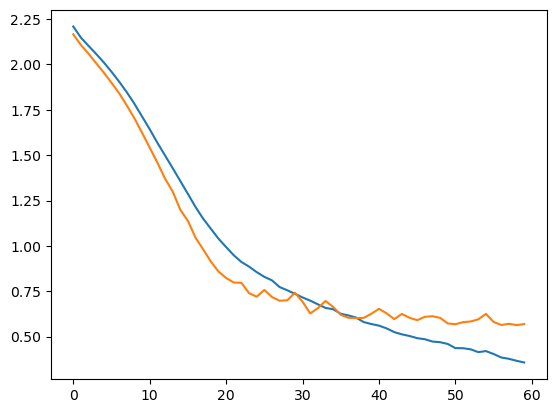

In [213]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

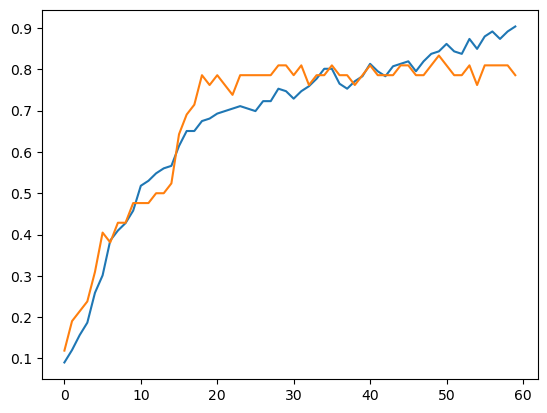

In [214]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [215]:
def chat_query(text, model):
    query_text = own_text_pre_proce(text)
    X_qry = simple_preprocess(query_text)
    # split the text and covert to word 2 vec
    X_qry = sent_vec(X_qry)
    # reshape it into tensor flow
    # X_qry = tf.stack(X_qry)
    # print(X_qry)
    # send it to predict function
    y_qry_prob = model.predict(X_qry.reshape(1,100))
    print(y_qry_prob)
    # convert prob into argmax
    y_qey_pred = y_qry_prob.argmax(axis=1)
    # print the tag value of the ypred index
    print(y_qey_pred)
    print(tag_encoder.classes_[y_qey_pred])

In [219]:
chat_query("How much it cost for single person", model)

1/1 [==============================] - 0s 20ms/step
[[3.19111734e-07 5.87434974e-04 1.17015106e-10 9.77614832e-07
  2.10438069e-04 1.11196141e-06 1.54382195e-02 9.83761489e-01
  4.35189094e-08]]
[7]
['price']
